# Using sentiment analysis to predict stock price

- Stocks(the price of a copy)
- Sentiment Analysis - Taking text and converting it into a numeric value to represent the feeling of the text

## Stock price / Sentiment Analysis

Goal of this notebook

1. Pull historic stock data with python
2. Explore stock price and plot them 
3. Pull historic tweet data about a specific stock
4. Run sentiment analysis
5. see if there are any leading indicators a stock price with sentiment.

In [1]:
#!pip install yfinance -q

In [2]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

## Example pulling stocks


In [3]:
msft = yf.Ticker("MSFT")

In [4]:
hist = msft.history(period='max')

In [5]:
type(hist)

pandas.core.frame.DataFrame

In [6]:
hist

Open        High         Low       Close  \
Date                                                                        
1986-03-13 00:00:00-05:00    0.055241    0.063365    0.055241    0.060657   
1986-03-14 00:00:00-05:00    0.060657    0.063907    0.060657    0.062823   
1986-03-17 00:00:00-05:00    0.062823    0.064448    0.062823    0.063907   
1986-03-18 00:00:00-05:00    0.063907    0.064448    0.061740    0.062281   
1986-03-19 00:00:00-05:00    0.062281    0.062823    0.060657    0.061198   
...                               ...         ...         ...         ...   
2023-02-27 00:00:00-05:00  252.460007  252.820007  249.389999  250.160004   
2023-02-28 00:00:00-05:00  249.070007  251.490005  248.729996  249.419998   
2023-03-01 00:00:00-05:00  250.759995  250.929993  245.789993  246.270004   
2023-03-02 00:00:00-05:00  246.550003  251.399994  245.610001  251.110001   
2023-03-03 00:00:00-05:00  252.190002  255.619995  251.389999  255.289993   

                               Volume  Dividends  Stock Splits  
Date                                                            
1986-03-13 00:00:00-05:00  1031788800        0.0           0.0  
1986-03-14 00:00:00-05:00   308160000        0.0           0.0  
1986-03-17 00:00:00-05:00   133171200        0.0           0.0  
1986-03-18 00:00:00-05:00    67766400        0.0           0.0  
1986-03-19 00:00:00-05:00    47894400        0.0           0.0  
...                               ...        ...           ...  
2023-02-27 00:00:00-05:00    21190000        0.0           0.0  
2023-02-28 00:00:00-05:00    22491000        0.0           0.0  
2023-03-01 00:00:00-05:00    27565300        0.0           0.0  
2023-03-02 00:00:00-05:00    24808200        0.0           0.0  
2023-03-03 00:00:00-05:00    30741300        0.0           0.0  

[9319 rows x 7 columns]

<AxesSubplot:xlabel='Date'>

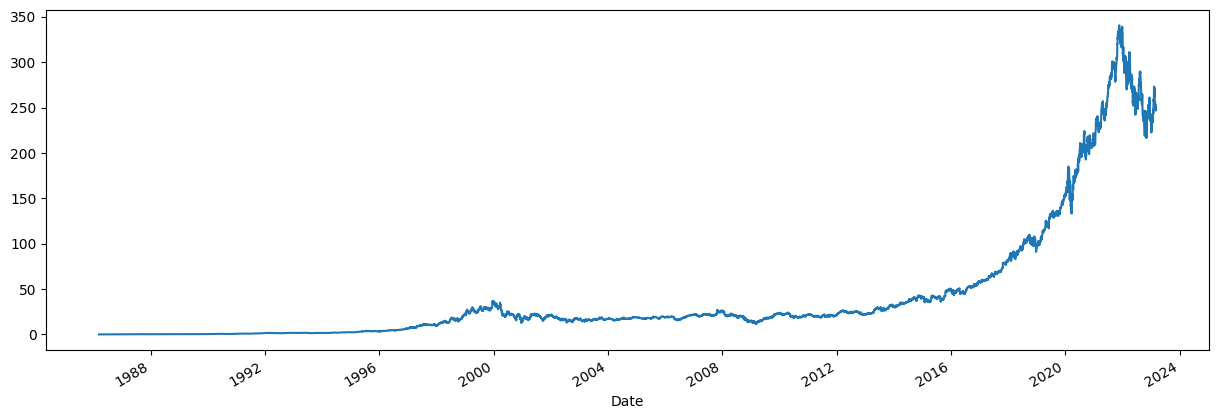

In [7]:
hist['Open'].plot(figsize = (15,5))

In [8]:
msft.actions

Dividends  Stock Splits
Date                                              
1987-09-21 00:00:00-04:00       0.00           2.0
1990-04-16 00:00:00-04:00       0.00           2.0
1991-06-27 00:00:00-04:00       0.00           1.5
1992-06-15 00:00:00-04:00       0.00           1.5
1994-05-23 00:00:00-04:00       0.00           2.0
...                              ...           ...
2022-02-16 00:00:00-05:00       0.62           0.0
2022-05-18 00:00:00-04:00       0.62           0.0
2022-08-17 00:00:00-04:00       0.62           0.0
2022-11-16 00:00:00-05:00       0.68           0.0
2023-02-15 00:00:00-05:00       0.68           0.0

[86 rows x 2 columns]

In [9]:
msft.splits

Date
1987-09-21 00:00:00-04:00    2.0
1990-04-16 00:00:00-04:00    2.0
1991-06-27 00:00:00-04:00    1.5
1992-06-15 00:00:00-04:00    1.5
1994-05-23 00:00:00-04:00    2.0
1996-12-09 00:00:00-05:00    2.0
1998-02-23 00:00:00-05:00    2.0
1999-03-29 00:00:00-05:00    2.0
2003-02-18 00:00:00-05:00    2.0
Name: Stock Splits, dtype: float64

## Pull a bunch of stocks
 - 3 years of history

In [10]:
stonks = [
    '^GSPC',
    'ETSY',
    'PINS',
    'SQ',
    'SHOP',
    'O',
    'MELI',
    'ISRG',
    'DIS',
    'BRK-B',
    'AMZN',
    'ZM',
    'PFE',
    'CLX',
    'DPZ',
    'RTX'
]

In [11]:
hists = {}
for s in stonks:
    tkr = yf.Ticker(s)
    history = tkr.history(period = '3y')
    hists[s] = history

## plot the stock price

In [18]:
stock = '^GSPC'
temp_df = hists[stock].copy()

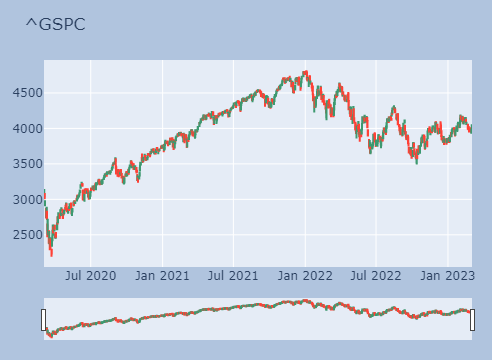

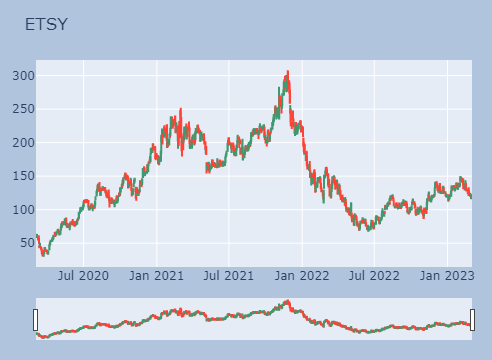

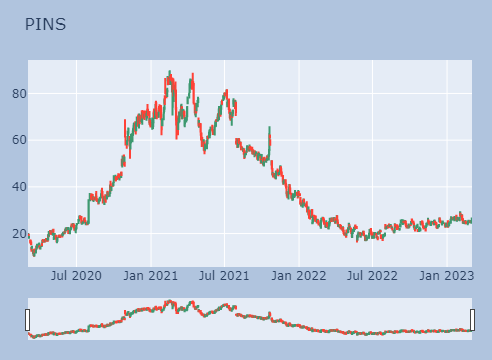

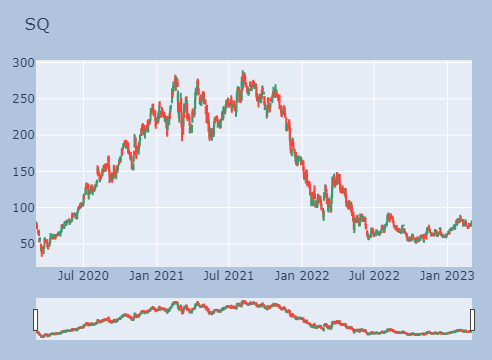

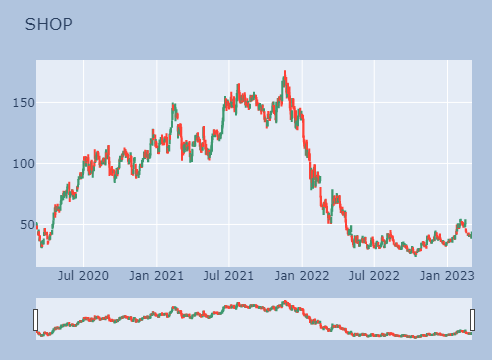

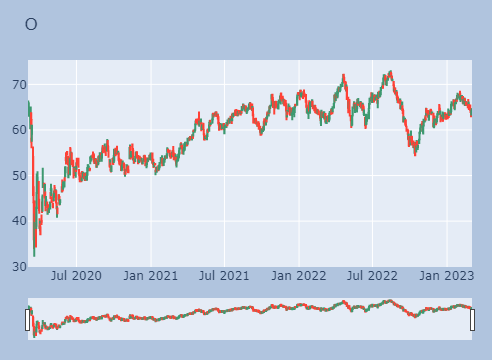

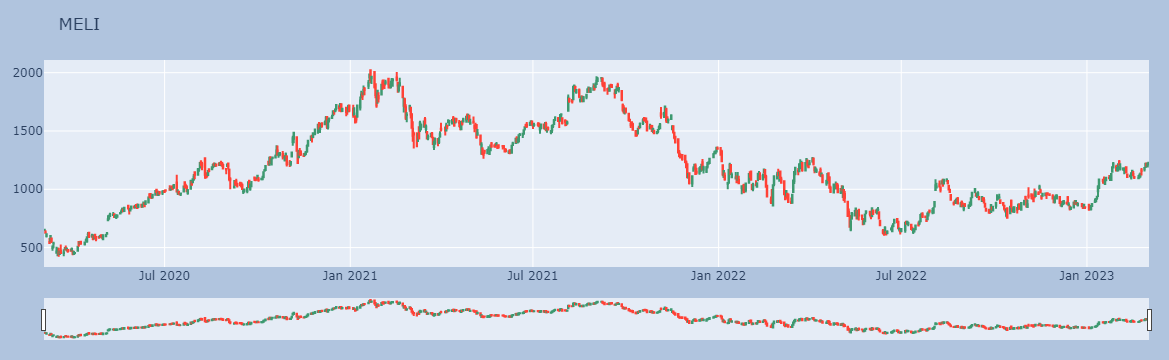

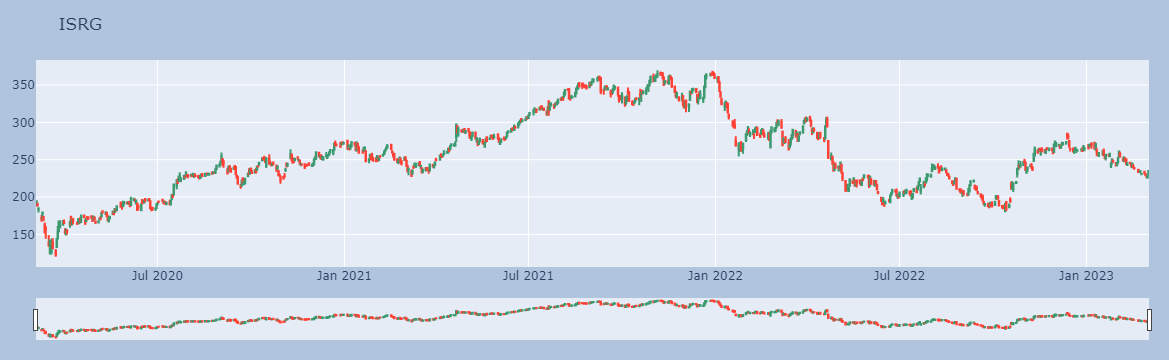

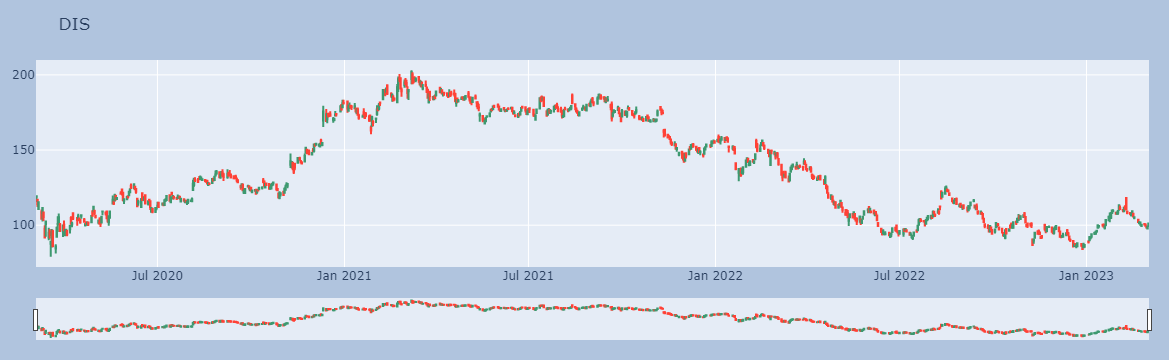

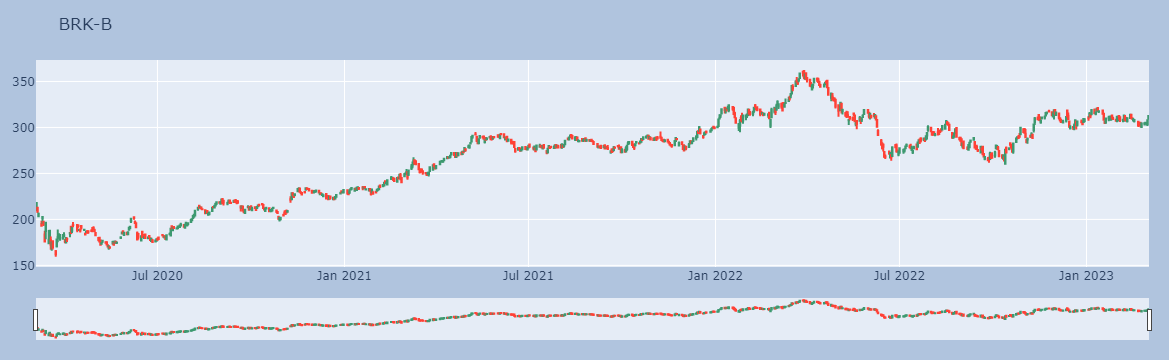

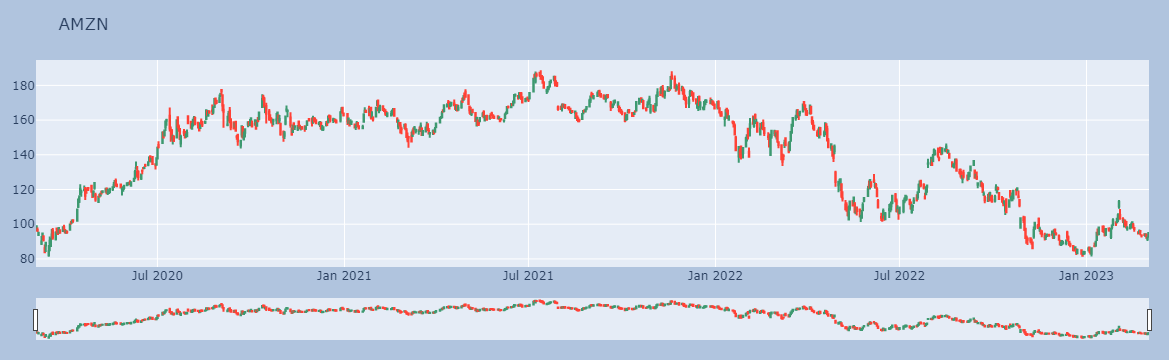

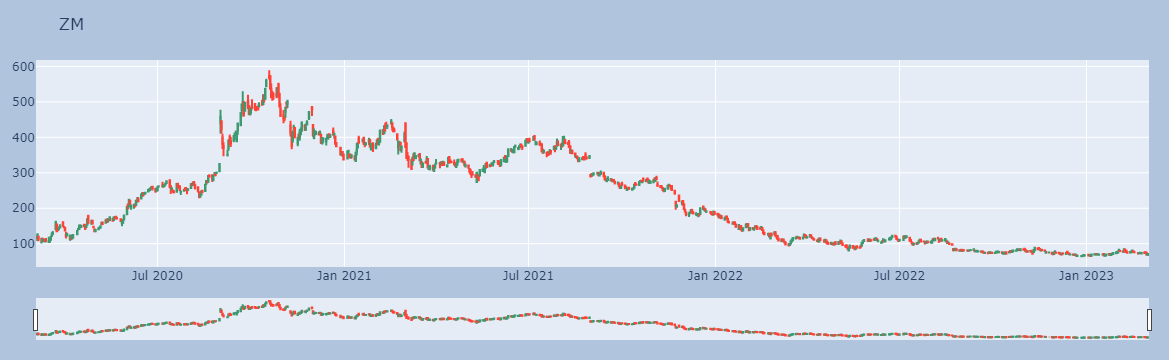

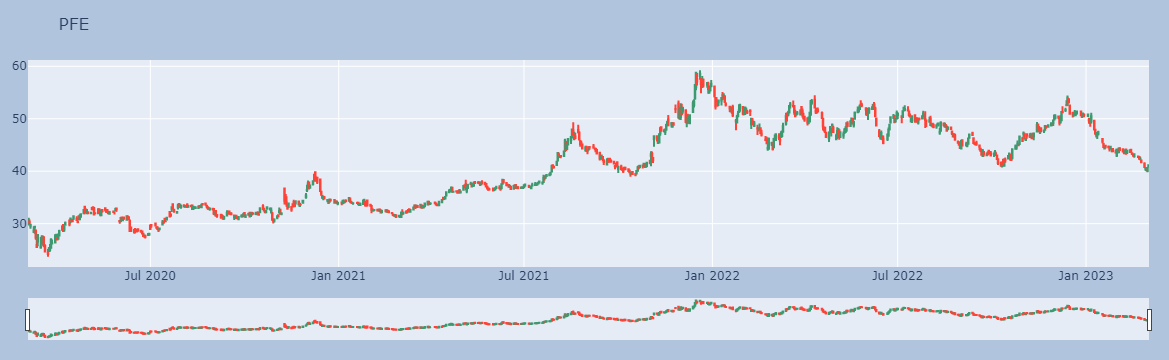

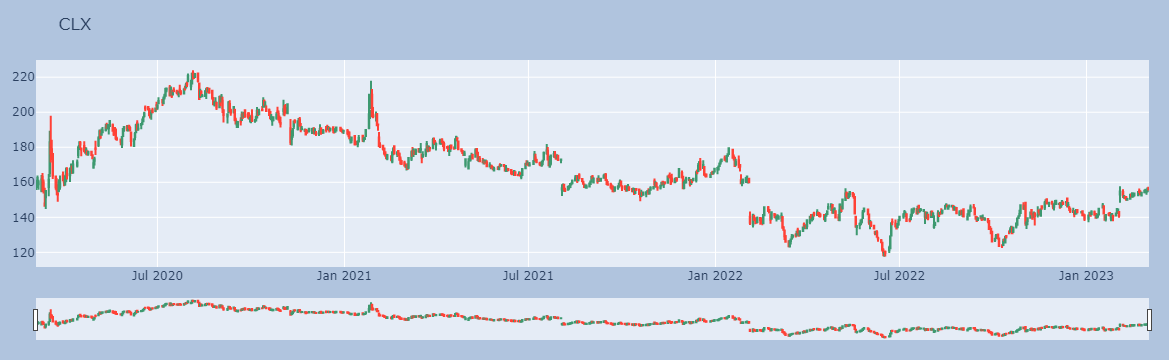

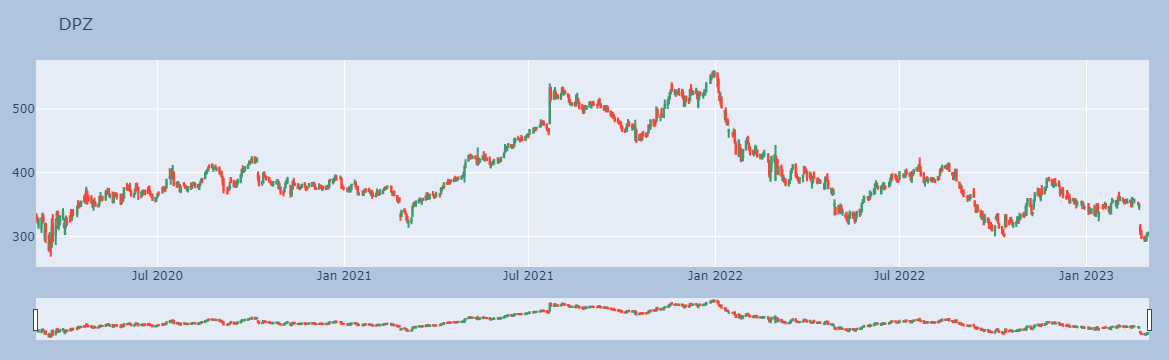

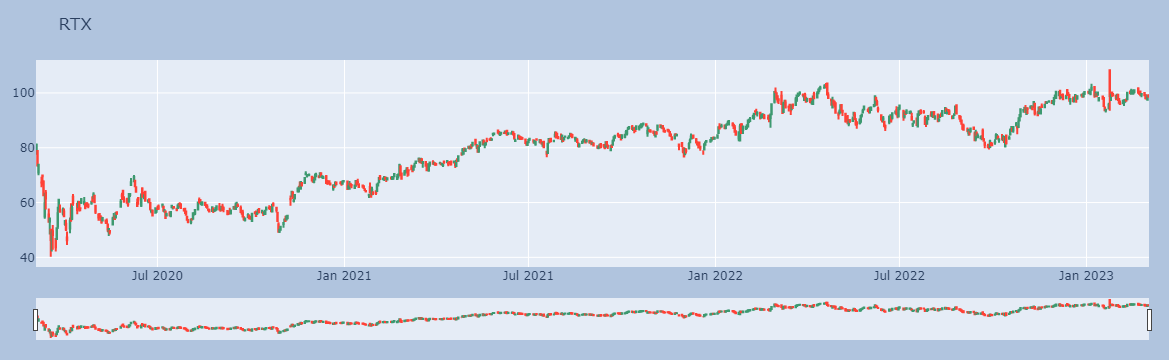

In [23]:
for stock in stonks:
    temp_df = hists[stock].copy()
    fig = go.Figure(
        data=[
            go.Candlestick(x=temp_df.index,
                    open=temp_df['Open'],
                    high=temp_df['High'],
                    low=temp_df['Low'],
                    close=temp_df['Close']
                          )
        ]
    )

    fig.update_layout(
        margin = dict(l = 20, r = 20, t = 60, b = 20),
        height = 300,
        paper_bgcolor = "LightSteelBlue",
        title = stock
    )
    fig.show()

##  Pull Tweets about each stocks

In [47]:
stock = "CLX"
stock

'CLX'

In [28]:
hists["CLX"].index.min()

Timestamp('2020-03-04 00:00:00-0500', tz='America/New_York')

In [53]:
import snscrape.modules.twitter as sntwitter
import pandas
from tqdm.notebook import tqdm

# Creating list to append tweet data
tweets_list = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in tqdm(
    enumerate(
        sntwitter.TwitterSearchScraper(
            f"${stock} since:2020-03-04 until:2023-03-04"
        ).get_items()
    ),
    total=12_000,
):  # declare a username
    if i > 12_000:  # number of tweets you want to scrape
        break
    tweets_list.append(
        [tweet.date, tweet.id, tweet.rawContent, tweet.user.username]
    )  # declare the attributes to be returned
# Creating a dataframe from the tweets list above
tweet_df = pd.DataFrame(
    tweets_list, columns=["Datetime", "Tweet Id", "Text", "Username"]
)

  0%|          | 0/12000 [00:00<?, ?it/s]

In [56]:
tweet_df.to_parquet("clx_tweets.parquet")

In [55]:
tweet_df["Datetime"].min()

Timestamp('2022-02-03 22:06:54+0000', tz='UTC')

In [57]:
tweet_df

Datetime             Tweet Id  \
0     2023-03-03 21:34:02+00:00  1631769928305897473   
1     2023-03-03 19:13:39+00:00  1631734600459513856   
2     2023-03-03 19:03:58+00:00  1631732164923645954   
3     2023-03-03 17:32:19+00:00  1631709097417637888   
4     2023-03-03 16:54:59+00:00  1631699702537400320   
...                         ...                  ...   
11996 2022-02-03 22:10:50+00:00  1489360757292732427   
11997 2022-02-03 22:09:16+00:00  1489360365498474496   
11998 2022-02-03 22:09:12+00:00  1489360346016063496   
11999 2022-02-03 22:08:51+00:00  1489360260406169601   
12000 2022-02-03 22:06:54+00:00  1489359769139879944   

                                                    Text         Username  
0      short ratio of $CL is 3.13 at 2019-05-31 https...  sunshineavenue8  
1      $CLX company #profile, #Fundamental and #Techn...    OptionsProVol  
2      $CLX Everyone is Buying the Dip Right Now.Hoar...  VelmaCh59575276  
3      $CLX Everyone is Buying the Dip Right Now.Hoar...  Beverly97739735  
4                    Clorox $CLX https://t.co/P6loepp9mE  InfinityInvestn  
...                                                  ...              ...  
11996  Clorox stock drops after company hit by lower ...     TechNewsClub  
11997  DailyDown5\n$CLX $151.48 -9.29% -8.45% -13.41%...      cho_wilfred  
11998  After Hours Losers\n\n$CLX -8.4%\n$SQQQ -5.8%\...     MarketRebels  
11999  @CramerTracker $F CRASHED AND $CLX GOT WIPED C...      maddog66615  
12000  I am shocked, mathematically.\n\n$CLX $KMB Pla...  chicago_quantum  

[12001 rows x 4 columns]

# Sentiment Analysis prep

In [59]:
tweet_df["Text"]

0        short ratio of $CL is 3.13 at 2019-05-31 https...
1        $CLX company #profile, #Fundamental and #Techn...
2        $CLX Everyone is Buying the Dip Right Now.Hoar...
3        $CLX Everyone is Buying the Dip Right Now.Hoar...
4                      Clorox $CLX https://t.co/P6loepp9mE
                               ...                        
11996    Clorox stock drops after company hit by lower ...
11997    DailyDown5\n$CLX $151.48 -9.29% -8.45% -13.41%...
11998    After Hours Losers\n\n$CLX -8.4%\n$SQQQ -5.8%\...
11999    @CramerTracker $F CRASHED AND $CLX GOT WIPED C...
12000    I am shocked, mathematically.\n\n$CLX $KMB Pla...
Name: Text, Length: 12001, dtype: object

In [62]:
from transformers import pipeline
model = f'cardiffnlp/twitter-roberta-base-sentiment-latest'
sentiment_task = pipeline("sentiment-analysis", model = model)
sentiment_task("Covid cases are increasing fast")

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'negative', 'score': 0.6372716426849365}]

In [74]:
sent_results = {}
count = 0
for i,d in tqdm(tweet_df.iterrows(), total = len(tweet_df)):
    sent = sentiment_task(d["Text"])
    sent_results[d["Tweet Id"]] = sent
    count +=1
    if count == 500:
        break

  0%|          | 0/12001 [00:00<?, ?it/s]

In [70]:
tweet_df["Text"][100]

'$CLX [15s. delayed]: Issued Press Release on February 28, 12:00:00: KINGSFORD® OPENS APPLICATIONS FOR THIRD YEAR OF PRESERVE THE PIT® FELLOWSHIP https://t.co/0RVtiUcWJB'

In [100]:
sent_df = pd.DataFrame(sent_results).T

In [101]:
sent_df["label"] = sent_df[0].apply(lambda x: x["label"])
sent_df["score"] = sent_df[0].apply(lambda x: x["score"])
sent_df = sent_df.merge(tweet_df.set_index("Tweet Id"), left_index = True, right_index = True)

In [102]:
sent_df

0  \
1631769928305897473  {'label': 'neutral', 'score': 0.8070654273033142}   
1631734600459513856  {'label': 'neutral', 'score': 0.8618888258934021}   
1631732164923645954  {'label': 'neutral', 'score': 0.7061002254486084}   
1631709097417637888  {'label': 'neutral', 'score': 0.7404712438583374}   
1631699702537400320   {'label': 'neutral', 'score': 0.749321699142456}   
...                                                                ...   
1625703335515893761  {'label': 'positive', 'score': 0.6353821754455...   
1625697339028688899  {'label': 'neutral', 'score': 0.8877058625221252}   
1625697315758686209  {'label': 'neutral', 'score': 0.8891699314117432}   
1625685330182676481  {'label': 'positive', 'score': 0.687933087348938}   
1625667871102877696  {'label': 'neutral', 'score': 0.8031094074249268}   

                        label     score                  Datetime  \
1631769928305897473   neutral  0.807065 2023-03-03 21:34:02+00:00   
1631734600459513856   neutral  0.861889 2023-03-03 19:13:39+00:00   
1631732164923645954   neutral  0.706100 2023-03-03 19:03:58+00:00   
1631709097417637888   neutral  0.740471 2023-03-03 17:32:19+00:00   
1631699702537400320   neutral  0.749322 2023-03-03 16:54:59+00:00   
...                       ...       ...                       ...   
1625703335515893761  positive  0.635382 2023-02-15 03:47:33+00:00   
1625697339028688899   neutral  0.887706 2023-02-15 03:23:44+00:00   
1625697315758686209   neutral  0.889170 2023-02-15 03:23:38+00:00   
1625685330182676481  positive  0.687933 2023-02-15 02:36:01+00:00   
1625667871102877696   neutral  0.803109 2023-02-15 01:26:38+00:00   

                                                                  Text  \
1631769928305897473  short ratio of $CL is 3.13 at 2019-05-31 https...   
1631734600459513856  $CLX company #profile, #Fundamental and #Techn...   
1631732164923645954  $CLX Everyone is Buying the Dip Right Now.Hoar...   
1631709097417637888  $CLX Everyone is Buying the Dip Right Now.Hoar...   
1631699702537400320                Clorox $CLX https://t.co/P6loepp9mE   
...                                                                ...   
1625703335515893761  Wonya Lucas is making big changes at the Hallm...   
1625697339028688899  $clx    Trade the US stock market? Before they...   
1625697315758686209  $clx   Trade the US stock market? Before they ...   
1625685330182676481  $CLX Top analyst price target for next week&gt...   
1625667871102877696  $CHD vs. $CLX: which stock is the best to buy?...   

                            Username  
1631769928305897473  sunshineavenue8  
1631734600459513856    OptionsProVol  
1631732164923645954  VelmaCh59575276  
1631709097417637888  Beverly97739735  
1631699702537400320  InfinityInvestn  
...                              ...  
1625703335515893761     newsfilterio  
1625697339028688899      RuthJOlson1  
1625697315758686209      RuthJOlson1  
1625685330182676481       BogerLilia  
1625667871102877696         Tickeron  

[500 rows x 6 columns]

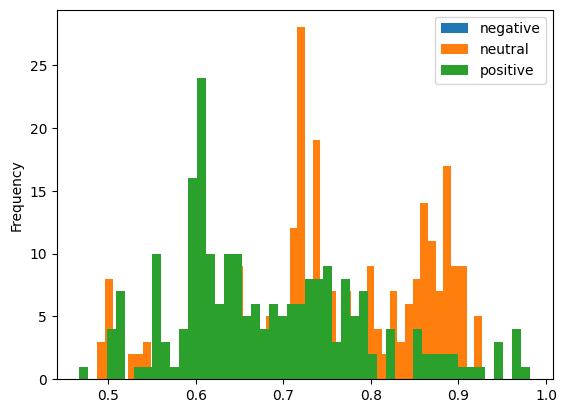

In [91]:
sent_df.groupby("label")["score"].plot(kind = 'hist', bins = 50)
plt.legend()
plt.show()

In [103]:
sent_df["score_"] = sent_df["score"]

sent_df.loc[sent_df["label"] == "negative", "score_"] = (
    sent_df.loc[sent_df["label"] == "negative","score"] * -1
)

sent_df.loc[sent_df["label"] == "neutral", "score_"] = 0

<AxesSubplot:ylabel='Frequency'>

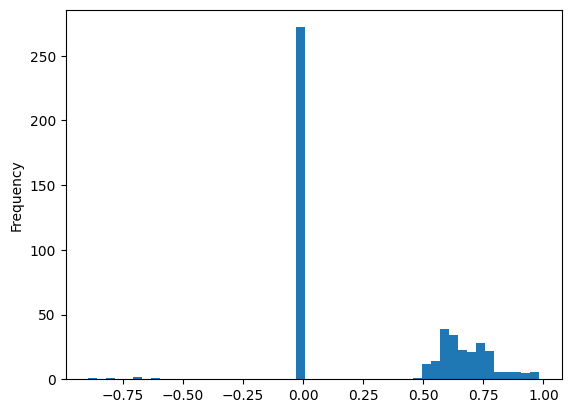

In [104]:
sent_df["score_"].plot(kind = 'hist', bins = 50)

In [108]:
sent_df.query('label == "negative"')["score_"]

1631261311823740929   -0.894443
1630709738827833344   -0.693838
1628849066233987072   -0.614015
1628844599639965696   -0.689159
1626630993431130113   -0.785553
Name: score_, dtype: float64

In [111]:
sent_df["Date"] = sent_df["Datetime"].dt.date

In [126]:
sent_daily = sent_df.groupby('Date')["score"].mean()

In [129]:
clx_df = hists["CLX"].copy()
clx_df = clx_df.reset_index()
clx_df["Date"] = clx_df["Date"].dt.date
clx_df = clx_df.set_index("Date")

In [134]:
sent_and_stock = sent_daily.to_frame("sentiment").merge(clx_df, left_index = True, right_index = True)

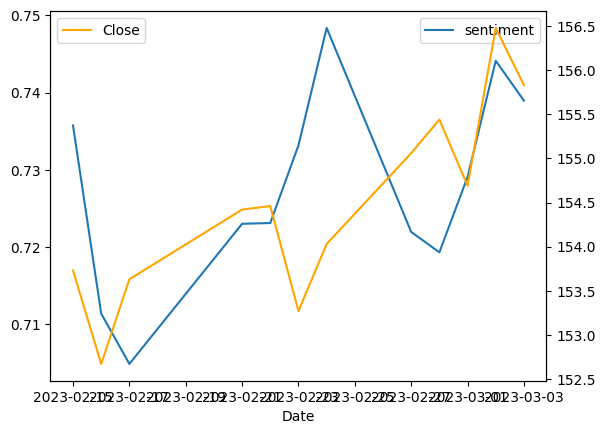

In [146]:
ax = sent_and_stock["sentiment"].plot(legend = "sentiment")
ax2 = ax.twinx()
sent_and_stock["Close"].plot(ax = ax2, color = "orange", legend = "closing price")
plt.show()